Saving 9. Customer Segmentation in E-commerce.csv to 9. Customer Segmentation in E-commerce.csv


<ipython-input-1-095c9a85ae64>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Convert to datetime


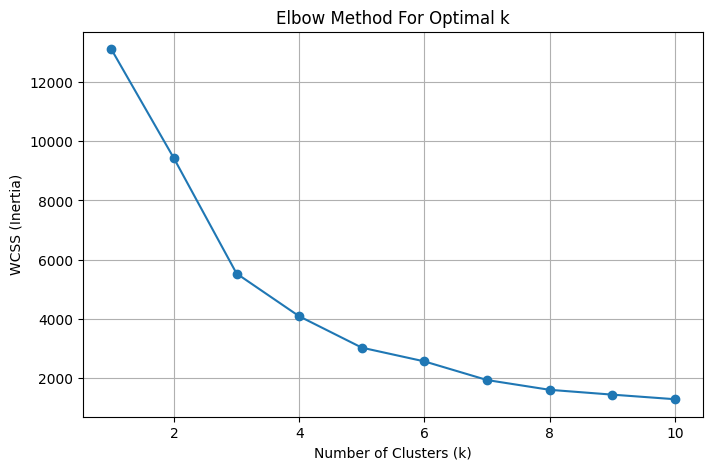

Customers per Cluster:
Cluster
3    3090
1    1077
0     194
2      11
Name: count, dtype: int64

Cluster Profiling (Mean RFM values):
            Recency   Frequency       Monetary
Cluster                                       
0         10.752577   28.510309   12168.264691
1        248.927577    1.805942     455.110716
2          5.090909  109.909091  124312.306364
3         42.780906    4.370550    1320.981506


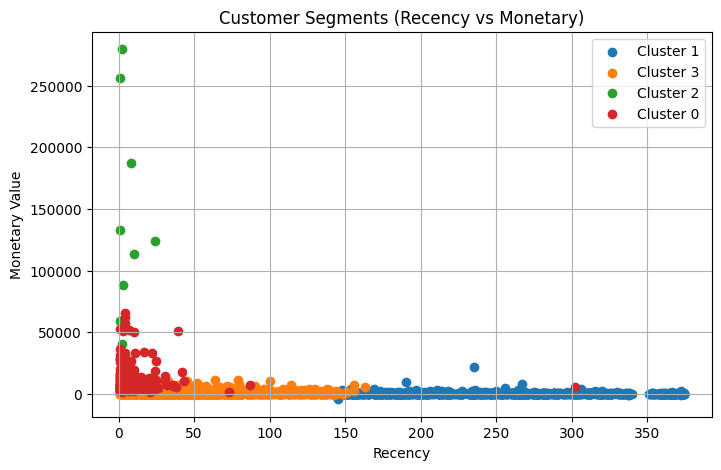

In [1]:
# Step 1: Upload the dataset
from google.colab import files
uploaded = files.upload()

# Step 2: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import datetime as dt

# Step 3: Load and preview the dataset
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Step 4: Clean and prepare the data
df = df[pd.notnull(df['CustomerID'])]  # Remove missing CustomerIDs
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Convert to datetime
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']  # Total amount spent

# Step 5: Create RFM (Recency, Frequency, Monetary) table
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Step 6: Normalize the RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Step 7: Find optimal clusters using Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Step 8: Apply KMeans Clustering (choose k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Step 9: Analyze Clusters
print("Customers per Cluster:")
print(rfm['Cluster'].value_counts())

print("\nCluster Profiling (Mean RFM values):")
print(rfm.groupby('Cluster').mean())

# Step 10: Visualize Clusters (Recency vs Monetary)
plt.figure(figsize=(8, 5))
for cluster in rfm['Cluster'].unique():
    subset = rfm[rfm['Cluster'] == cluster]
    plt.scatter(subset['Recency'], subset['Monetary'], label=f'Cluster {cluster}')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.title('Customer Segments (Recency vs Monetary)')
plt.legend()
plt.grid(True)
plt.show()
